# IBM HR Analytics

Below is the checklist that can guide through Machine Learning projects.
* Frame the problem and look at the big picture.
* Get the data.
* Explore the data to gain insights.
* Prepare the data to better expose the underlying data patterns to Machine Learning algorthims.
* Explore many different models and shortlist the best ones.
* Fine-tune your models and combine them into a great solutions.
* Present your solution.
* Launch, monitor and maintain your system.

# Frame the Problem and look at the big picture

### Dataset

- **Dataset Name**: IBM HR Analytics Employee Attrition & Performance
- **Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)
- **Description**: This dataset is a fictional set created by IBM data scientists to understand the factors contributing to employee attrition and performance. It includes various attributes related to employees' personal and professional aspects.

### Features

| Hierarchy_Level                  | Education Levels | Environment Satisfaction | Job Involvement | Job Satisfaction | Performance Rating | Relationship Satisfaction | Work-Life Balance |
|--------------------------|------------------|---------------------------|-----------------|------------------|--------------------|----------------------------|-------------------|
| 1                  | Below College    | Low                       | Low             | Low              | Low                | Low                        | Bad               |
| 2                  | College          | Medium                    | Medium          | Medium           | Good               | Medium                     | Good              |
| 3                  | Bachelor         | High                      | High            | High             | Excellent          | High                       | Better            |
| 4                  | Master           | Very High                 | Very High       | Very High        | Outstanding        | Very High                  | Best              |
| 5                  | Doctor           | -                         | -               | -                | -                  | -                          | -                 |

### Project Objectives
1. Analyze Employee Attrition: Uncover key factors that lead to employee attrition.
2. Explore Job Roles and Distance from Home: Break down the distance from home by job role and attrition status.
3. Compare Income by Education and Attrition: Compare the average monthly income based on education level and attrition status.
4. Visualize Satisfaction and Performance Metrics: Visualize different satisfaction metrics and performance ratings across various employee demographics.

In [1]:
# Read libraries here
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen
pd.set_option('display.max_rows', None)  # Display all rows
%matplotlib inline

# Get the Data

In [2]:
df = pd.read_csv('Data\HR_Analytics.csv')
print(df.shape)

(1470, 35)


# Explore the data to gain insights.

In [3]:
df1 = df.copy()
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

26 numerical and 9 non numerical features

In [5]:
# Numerical Features Summary
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Any duplicates for EmployeeNumber
df1['EmployeeNumber'].duplicated().sum()

0

In [7]:
# Any duplicate rows
df1.duplicated().sum()

0

In [8]:
print("Total null values:",df1.isnull().any().sum())

Total null values: 0


In [9]:
# String Categorical features Summary
df1.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Features to drop
* EmployeeCount,StandardHours,Over18  since they show only one value
* and EmployeeNumber since it a unique value associated to the employee, we will not require this in our analysis

In [10]:
df1=df1.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1)

In [11]:
df1['Attrition']=df1['Attrition'] == 'Yes'

In [12]:
df1.select_dtypes(exclude=['number']).columns.to_list()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [13]:
def column_list_seggregate(df:pd.DataFrame)->tuple:
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns.to_list()
    numeric_columns = df.select_dtypes(include=['number']).columns.to_list()
    return numeric_columns,non_numeric_columns
numeric_columns,non_numeric_columns = column_list_seggregate(df1)

In [14]:
print("Total Number of Columns :",df1.shape[1],"\n Numerical Columns :",len(numeric_columns),"\n Non Numerical Columns :",len(non_numeric_columns))

Total Number of Columns : 31 
 Numerical Columns : 23 
 Non Numerical Columns : 8


# Prepare the data to better expose the underlying data patterns to Machine Learning algorthims.

In [15]:
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


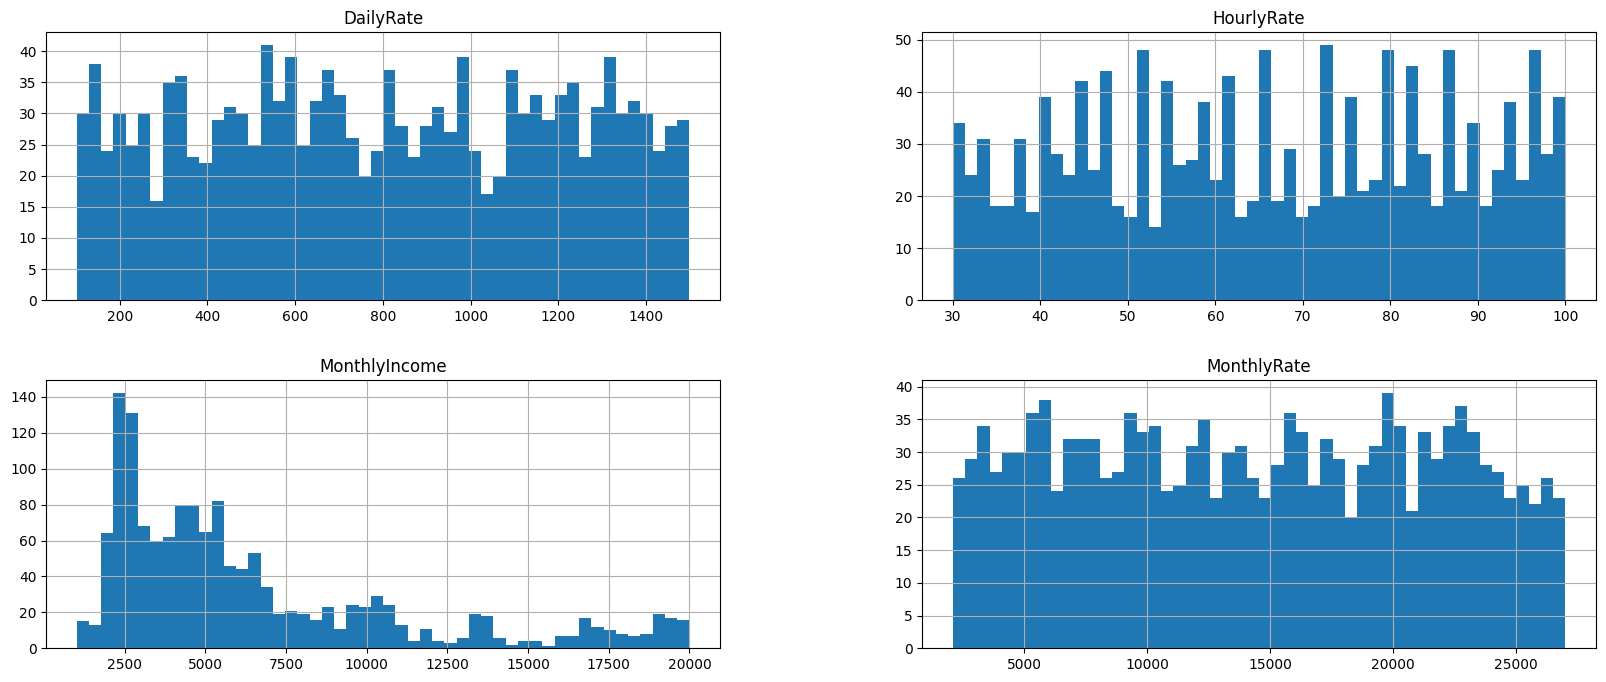

In [16]:
df1[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']].hist(bins=50,figsize=(20,8))
plt.show()

In [17]:
# Find highly correlated features
threshold = 0.8
corr_pairs = df1[numeric_columns].corr().abs().unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
print(high_corr_pairs)

JobLevel       MonthlyIncome    0.9503
MonthlyIncome  JobLevel         0.9503
dtype: float64


In [18]:
df1[['MonthlyIncome','JobLevel','Attrition']].corr()['Attrition']

MonthlyIncome   -0.159840
JobLevel        -0.169105
Attrition        1.000000
Name: Attrition, dtype: float64

In [19]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

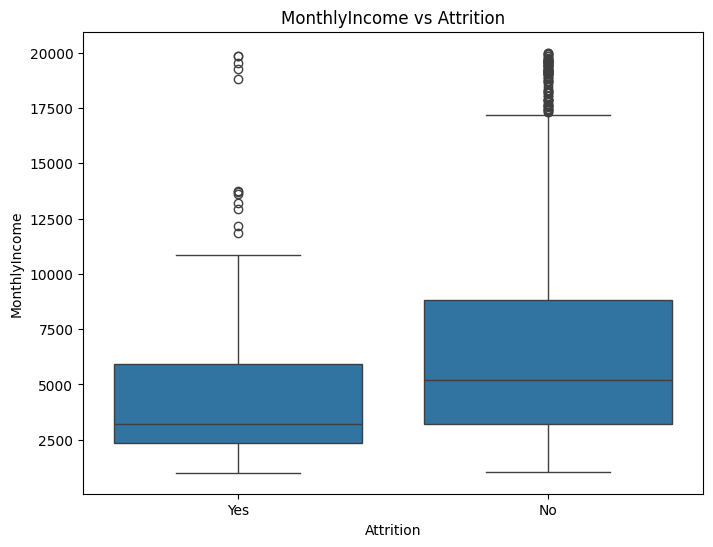

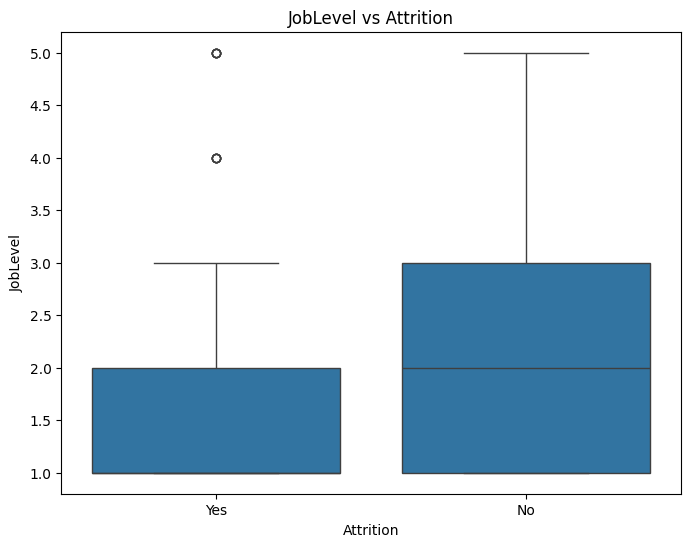

In [20]:
for col in ['MonthlyIncome','JobLevel']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()

### 'MonthlyIncome' is dropped
* It is highly correlated with Job Level 
* It is less correlated to Attrition (By Pearson Correlation coeff) 
* it contains lot of outliers as compared to Job Level

In [21]:
df1.drop(['MonthlyIncome'],inplace=True,axis=1)

In [22]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)

In [23]:
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [24]:
df1[numeric_columns+['Attrition']].corr()['Attrition'].sort_values(key=abs)

PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
MonthlyRate                 0.015170
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
NumCompaniesWorked          0.043494
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
DistanceFromHome            0.077924
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Attrition                   1.000000
Name: Attrition, dtype: float64

In [25]:
len(numeric_columns)

22

In [26]:
# Identify qualitative features
qualitative_features = [col for col in df1.columns if df1[col].nunique() < 10]

# Identify quantitative features (not in qualitative features)
quantitative_features = [col for col in df1.columns if col not in qualitative_features]

qualitative_features.remove('Attrition')

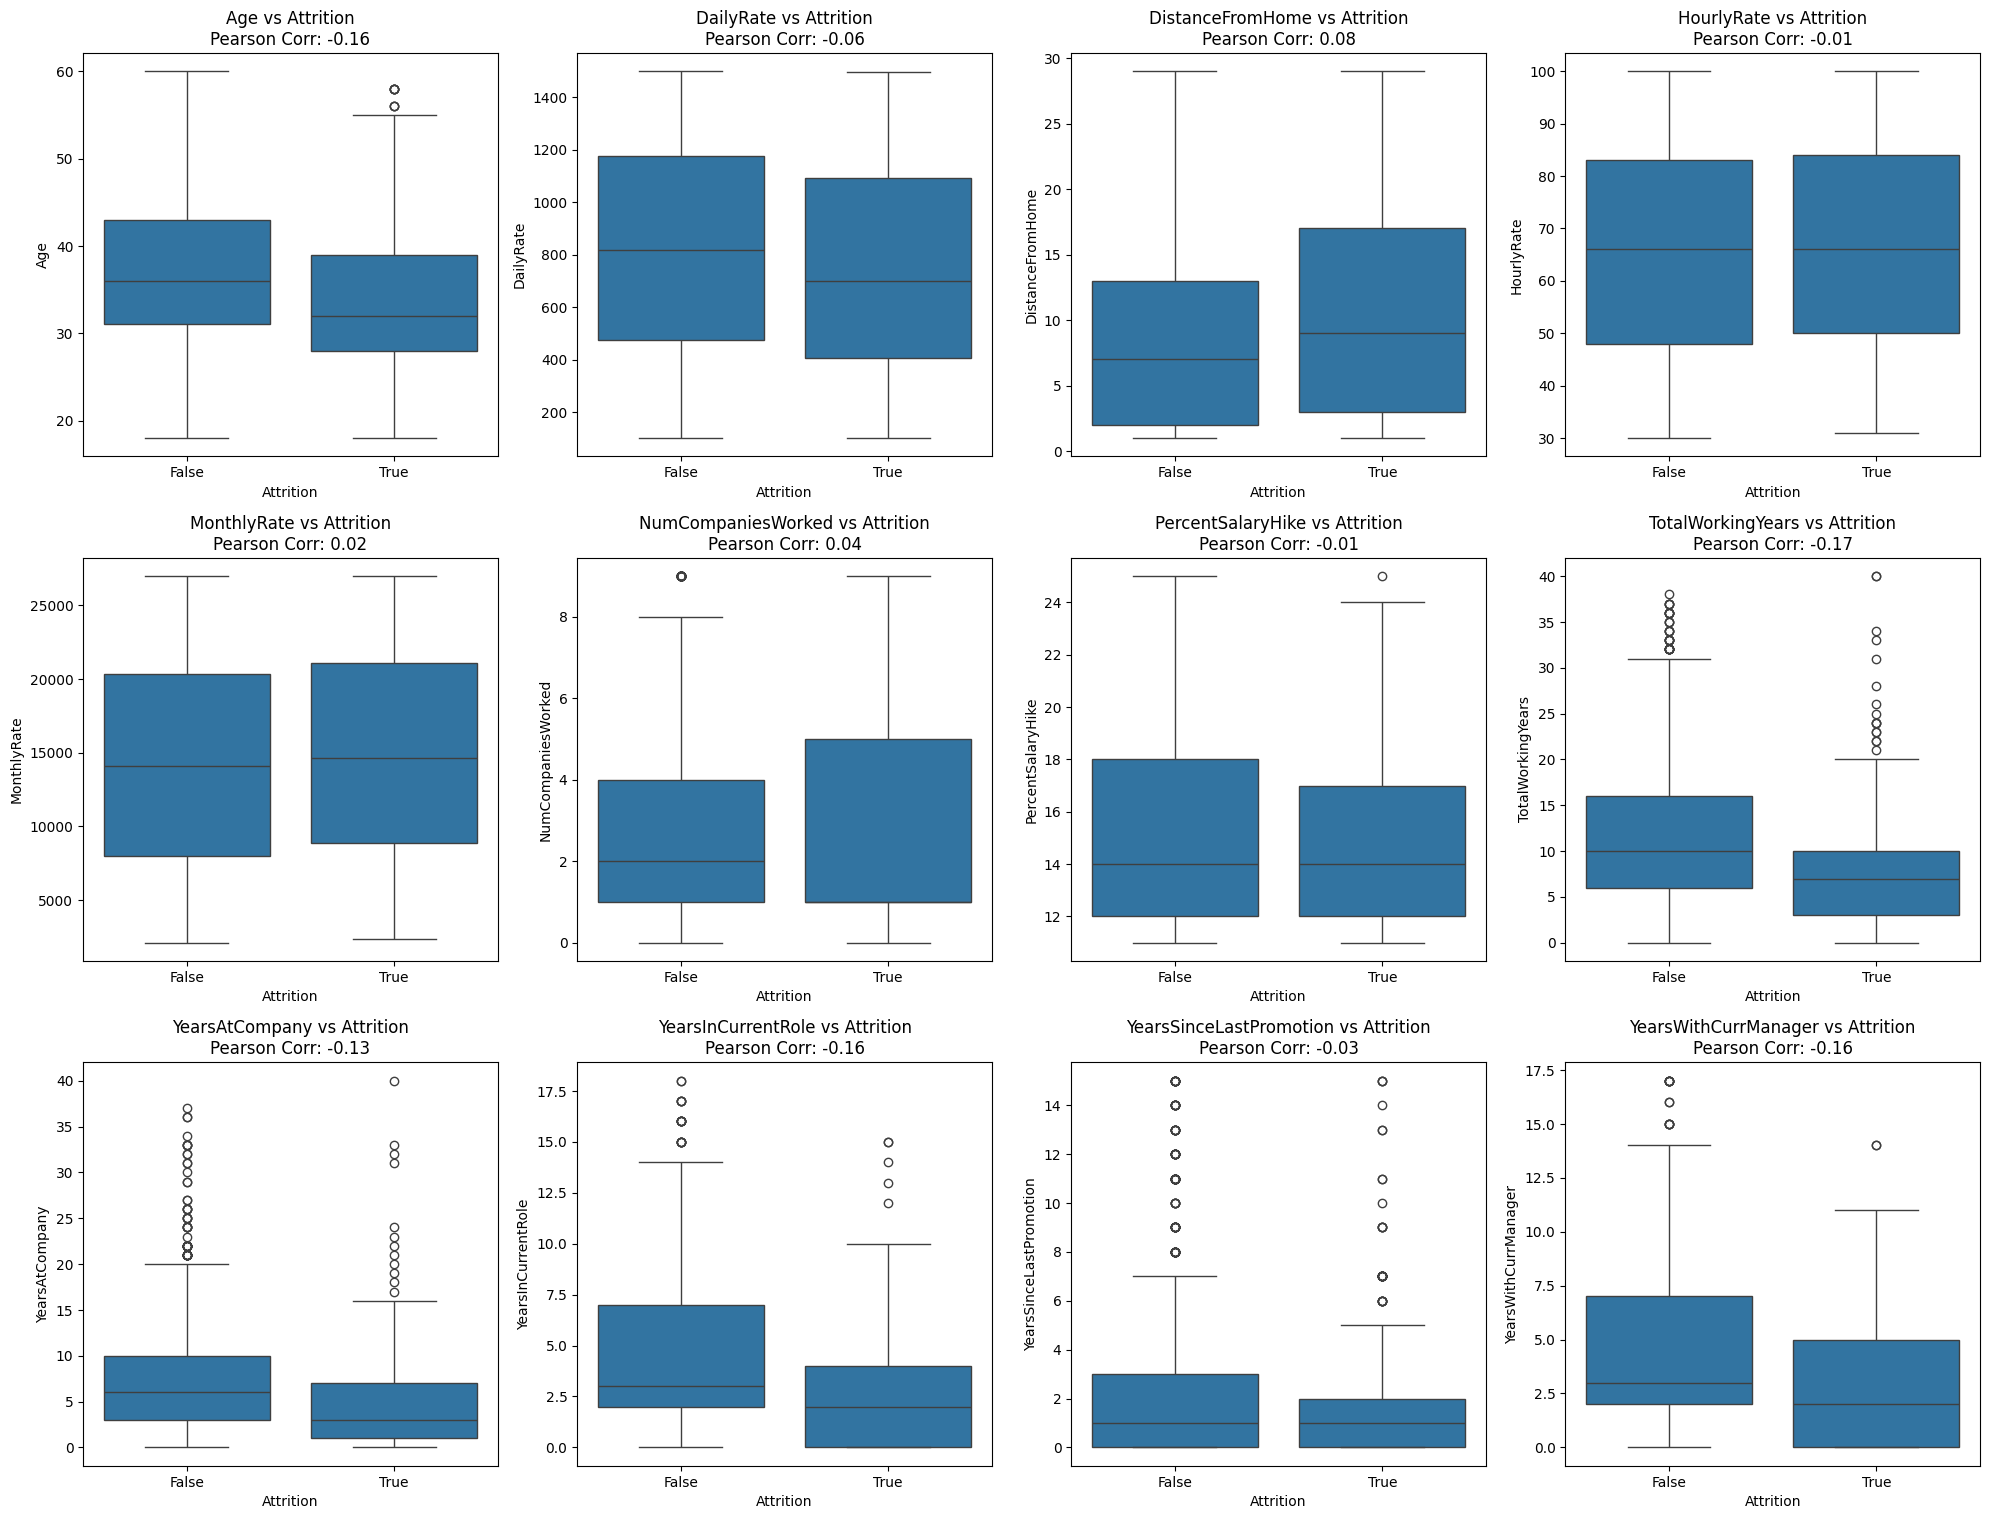

In [27]:
# Number of columns and rows for the grid
n_cols = 4
n_rows = 6

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()
quantitative_features_to_remove=[]
# Plot box plots
for i, col in enumerate(quantitative_features):
    sns.boxplot(x='Attrition', y=col, data=df1, ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition\nPearson Corr: {df1[[col,"Attrition"]].corr().iloc[0,1]:.2f}')
    if abs(df1[[col,"Attrition"]].corr().iloc[0,1])<=0.03:
        quantitative_features_to_remove.append(col)
# Remove any empty subplots if there are any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
df1['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

#### Features to remove
* PerformanceRating,HourlyRate, MonthlyRate,Education,WorkLifeBalance,PercentSalaryHike,JobInvolvement,YearsSinceLastPromotion,EnvironmentSatisfaction,TrainingTimesLastYear,RelationshipSatisfaction,JobSatisfaction,YearsSinceLastPromotion,NumCompaniesWorked

### Chi-Squared Test for Qualitative Features

Chi-Squared Test for BusinessTravel:
Chi2 Stat: 24.182413685655174, P-value: 5.608614476449931e-06, Degrees of Freedom: 2
Expected Frequencies:
[[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]




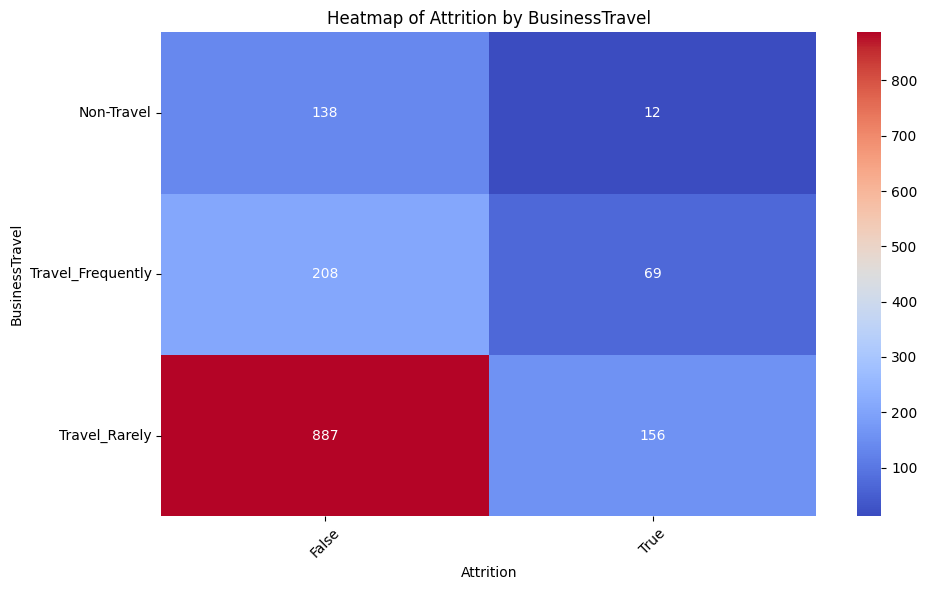

Chi-Squared Test for Department:
Chi2 Stat: 10.79600732241067, P-value: 0.004525606574479634, Degrees of Freedom: 2
Expected Frequencies:
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]




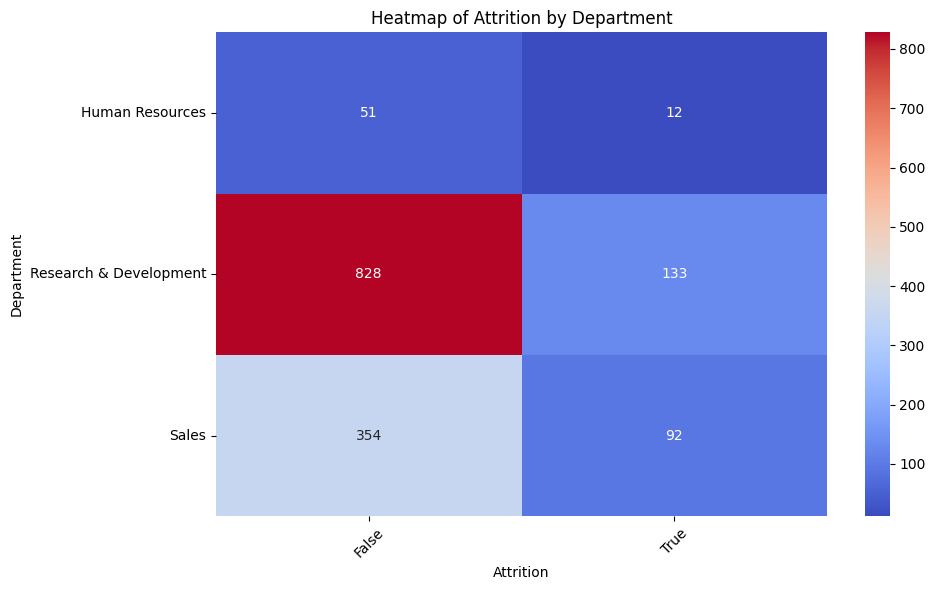

Chi-Squared Test for Education:
Chi2 Stat: 3.0739613982367193, P-value: 0.5455253376565949, Degrees of Freedom: 4
Expected Frequencies:
[[142.59183673  27.40816327]
 [236.53469388  45.46530612]
 [479.77959184  92.22040816]
 [333.83265306  64.16734694]
 [ 40.26122449   7.73877551]]




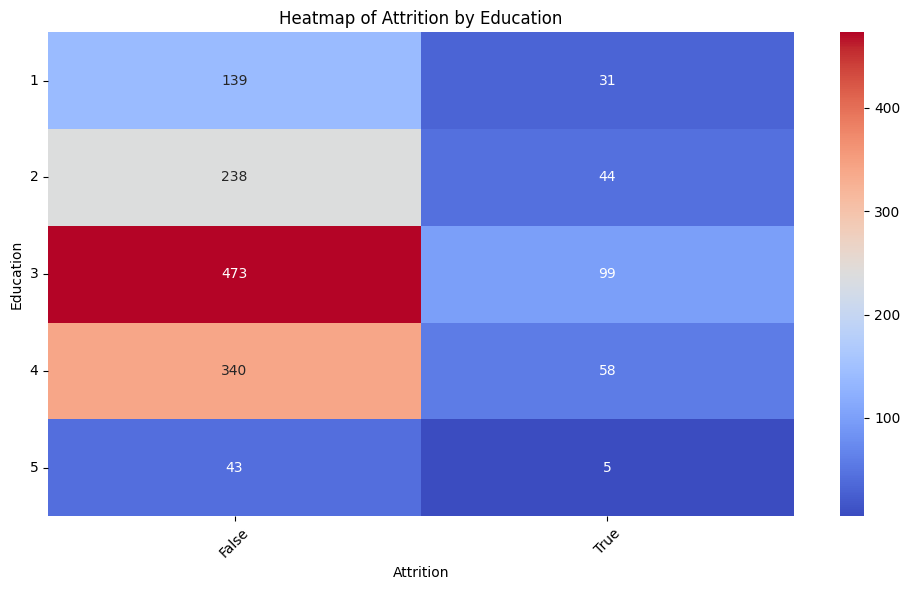

Chi-Squared Test for EducationField:
Chi2 Stat: 16.024674119585427, P-value: 0.006773980139025213, Degrees of Freedom: 5
Expected Frequencies:
[[ 22.64693878   4.35306122]
 [508.29795918  97.70204082]
 [133.36530612  25.63469388]
 [389.19183673  74.80816327]
 [ 68.77959184  13.22040816]
 [110.71836735  21.28163265]]




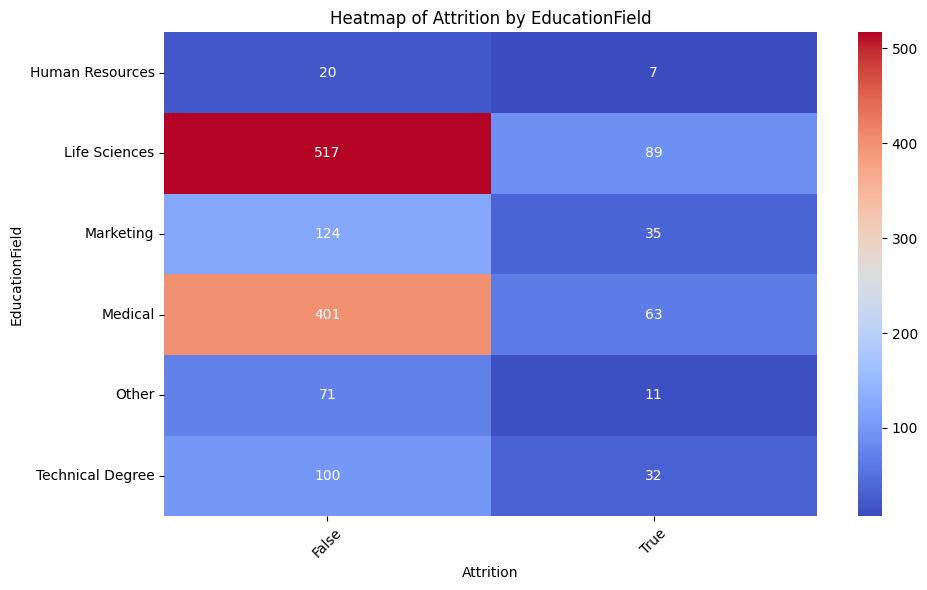

Chi-Squared Test for EnvironmentSatisfaction:
Chi2 Stat: 22.503881435842295, P-value: 5.1234689062894205e-05, Degrees of Freedom: 3
Expected Frequencies:
[[238.2122449   45.7877551 ]
 [240.72857143  46.27142857]
 [379.96530612  73.03469388]
 [374.09387755  71.90612245]]




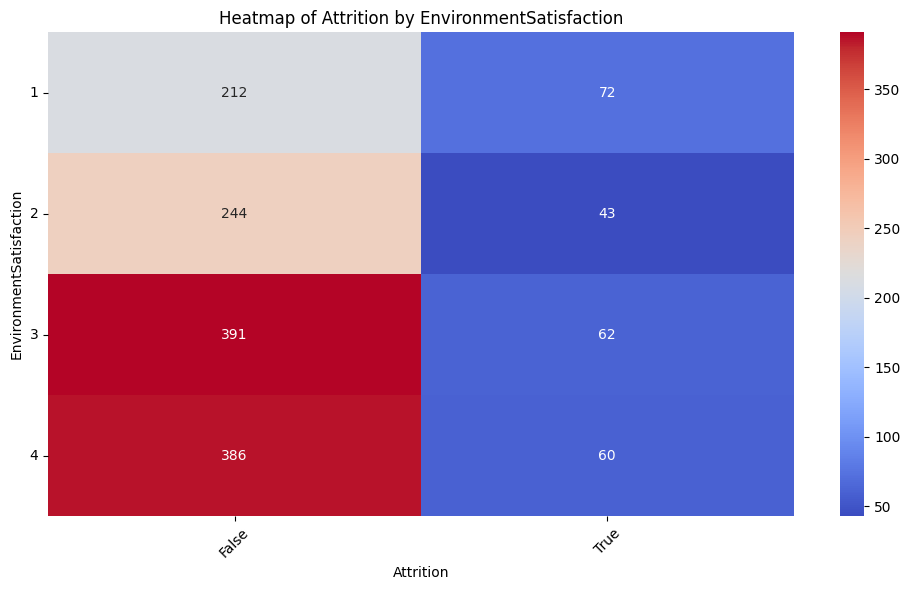

Chi-Squared Test for Gender:
Chi2 Stat: 1.1169671241970975, P-value: 0.29057244902890855, Degrees of Freedom: 1
Expected Frequencies:
[[493.2  94.8]
 [739.8 142.2]]




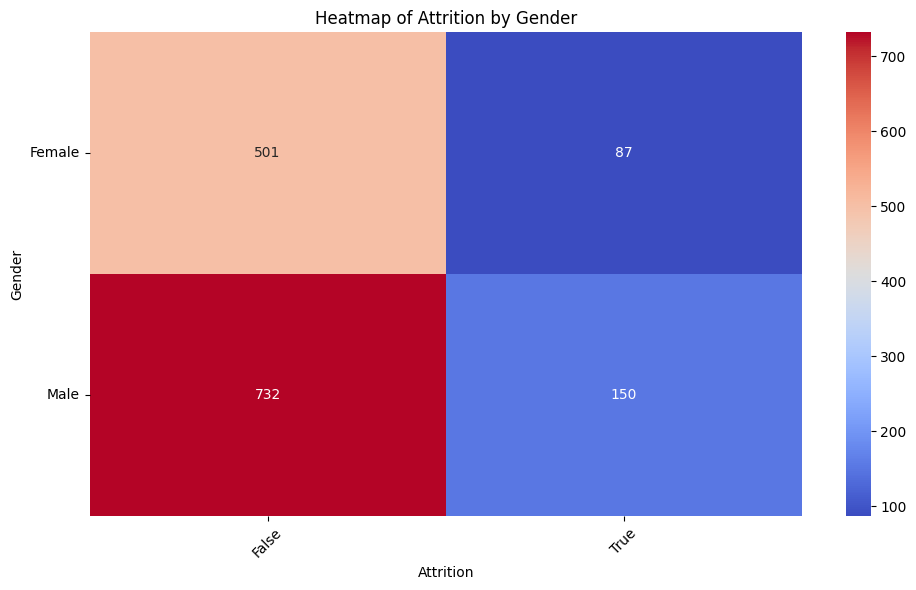

Chi-Squared Test for JobInvolvement:
Chi2 Stat: 28.492021234659283, P-value: 2.8631806367134195e-06, Degrees of Freedom: 3
Expected Frequencies:
[[ 69.61836735  13.38163265]
 [314.54081633  60.45918367]
 [728.05714286 139.94285714]
 [120.78367347  23.21632653]]




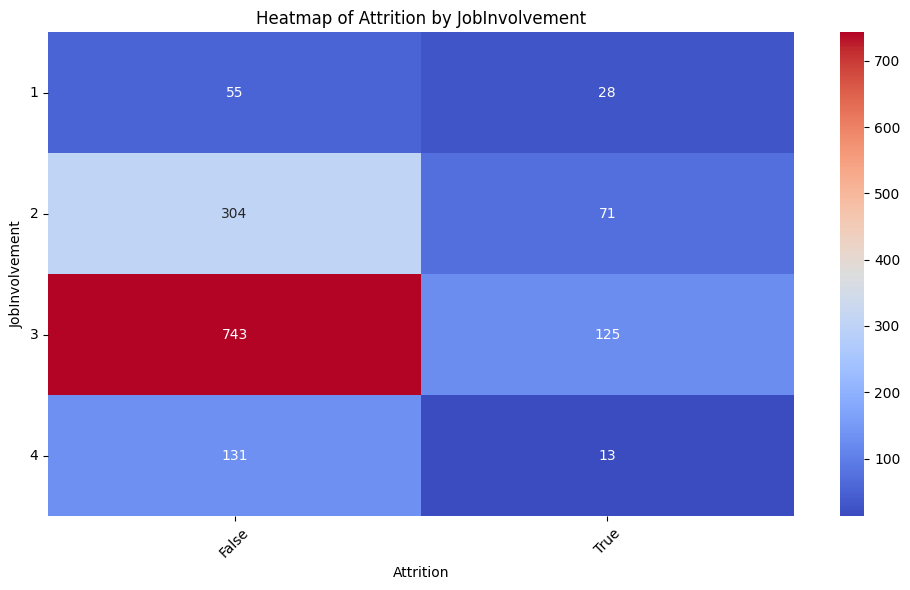

Chi-Squared Test for JobLevel:
Chi2 Stat: 72.5290131066739, P-value: 6.634684715458957e-15, Degrees of Freedom: 4
Expected Frequencies:
[[455.45510204  87.54489796]
 [447.90612245  86.09387755]
 [182.85306122  35.14693878]
 [ 88.91020408  17.08979592]
 [ 57.8755102   11.1244898 ]]




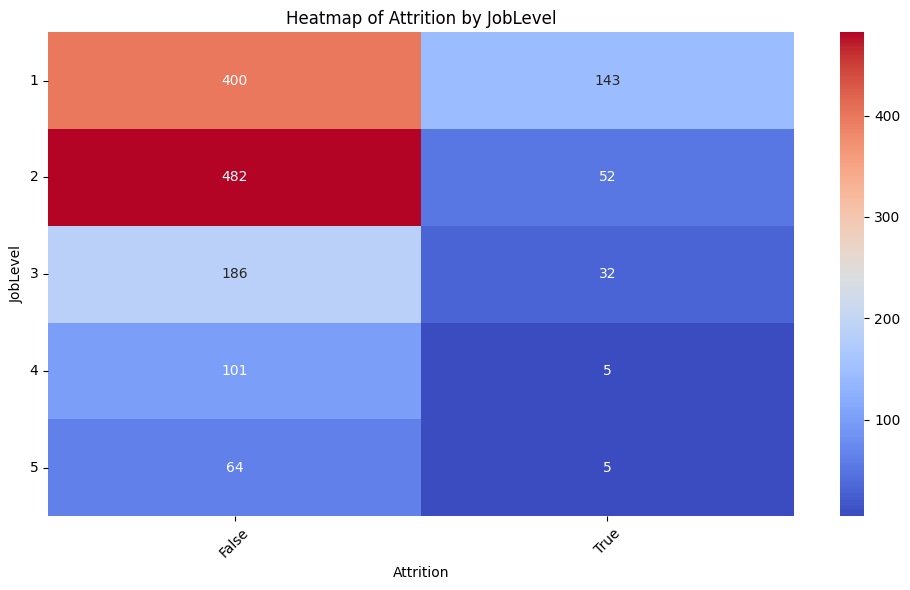

Chi-Squared Test for JobRole:
Chi2 Stat: 86.19025367670434, P-value: 2.7524816380506567e-15, Degrees of Freedom: 8
Expected Frequencies:
[[109.87959184  21.12040816]
 [ 43.61632653   8.38367347]
 [217.24285714  41.75714286]
 [ 85.55510204  16.44489796]
 [121.62244898  23.37755102]
 [ 67.10204082  12.89795918]
 [244.92244898  47.07755102]
 [273.44081633  52.55918367]
 [ 69.61836735  13.38163265]]




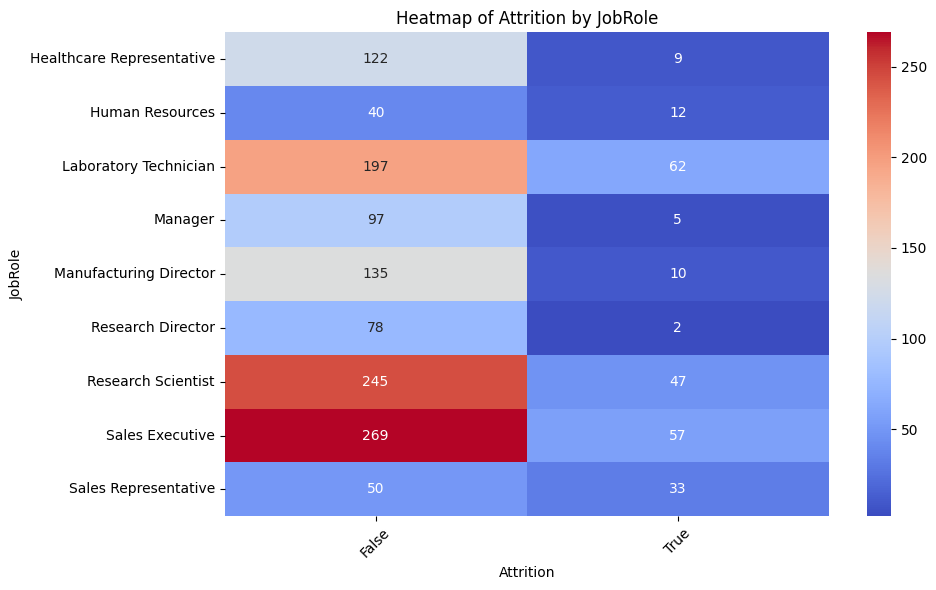

Chi-Squared Test for JobSatisfaction:
Chi2 Stat: 17.505077010348, P-value: 0.0005563004510387556, Degrees of Freedom: 3
Expected Frequencies:
[[242.40612245  46.59387755]
 [234.85714286  45.14285714]
 [370.73877551  71.26122449]
 [384.99795918  74.00204082]]




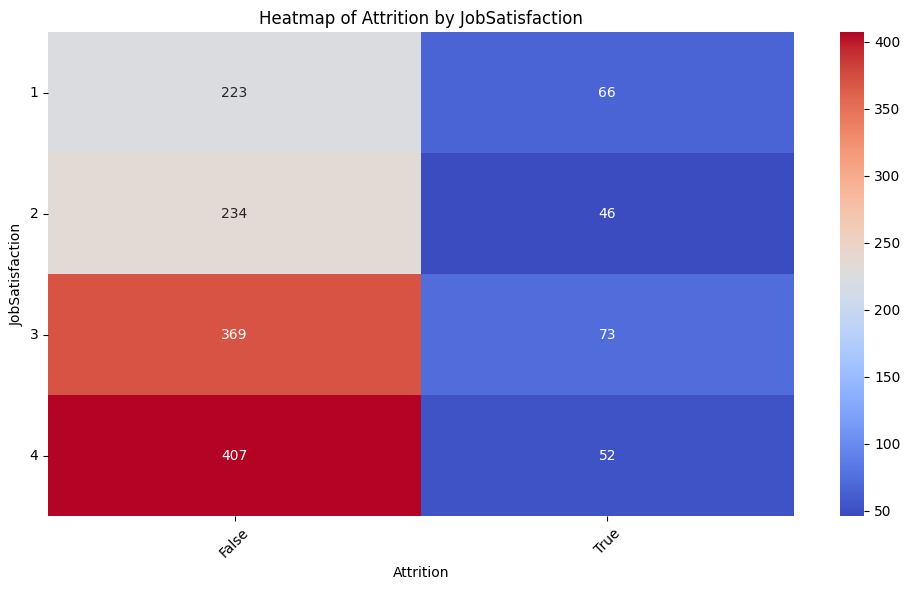

Chi-Squared Test for MaritalStatus:
Chi2 Stat: 46.163676540848705, P-value: 9.455511060340833e-11, Degrees of Freedom: 2
Expected Frequencies:
[[274.27959184  52.72040816]
 [564.49591837 108.50408163]
 [394.2244898   75.7755102 ]]




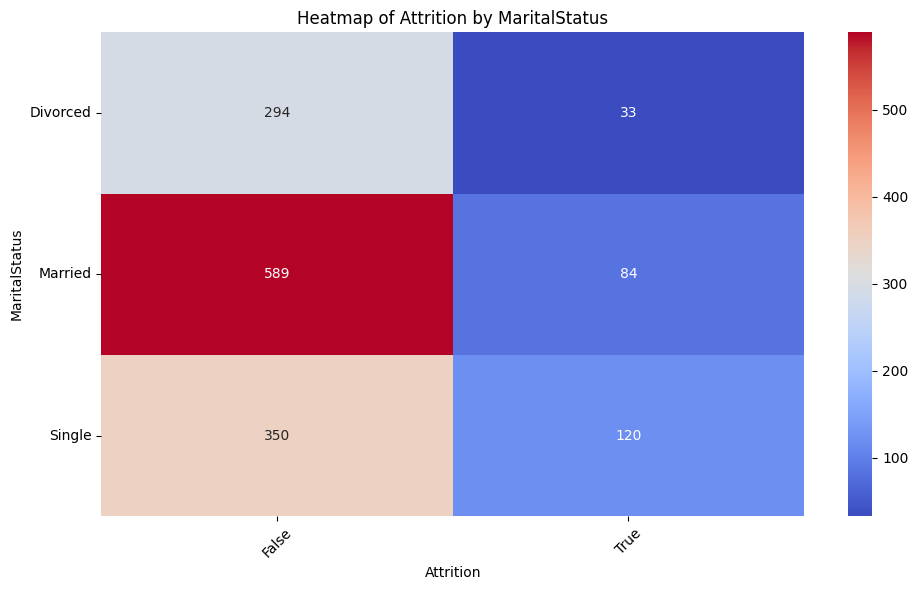

Chi-Squared Test for OverTime:
Chi2 Stat: 87.56429365828768, P-value: 8.158423721538322e-21, Degrees of Freedom: 1
Expected Frequencies:
[[884.06938776 169.93061224]
 [348.93061224  67.06938776]]




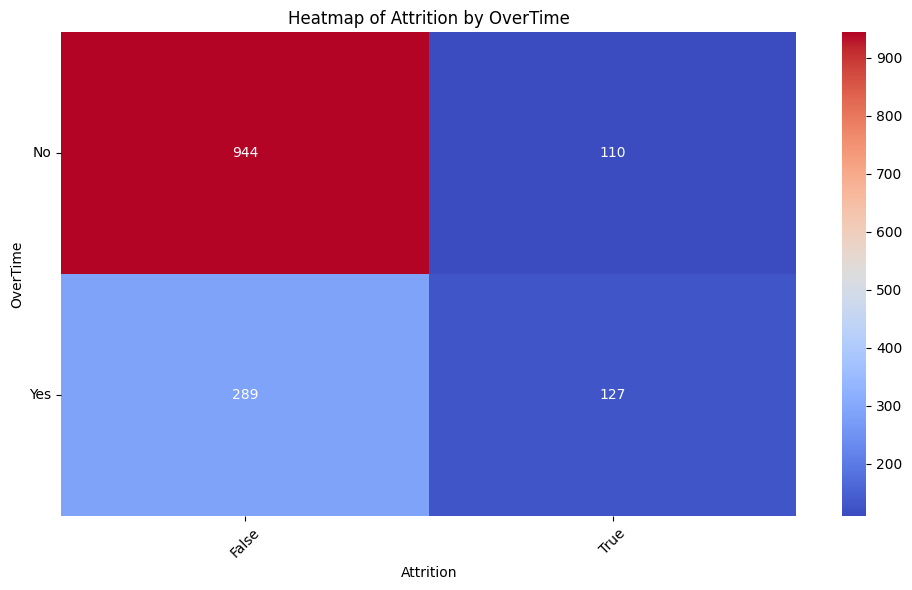

Chi-Squared Test for PerformanceRating:
Chi2 Stat: 0.00015475439428271534, P-value: 0.9900745465934576, Degrees of Freedom: 1
Expected Frequencies:
[[1043.43673469  200.56326531]
 [ 189.56326531   36.43673469]]




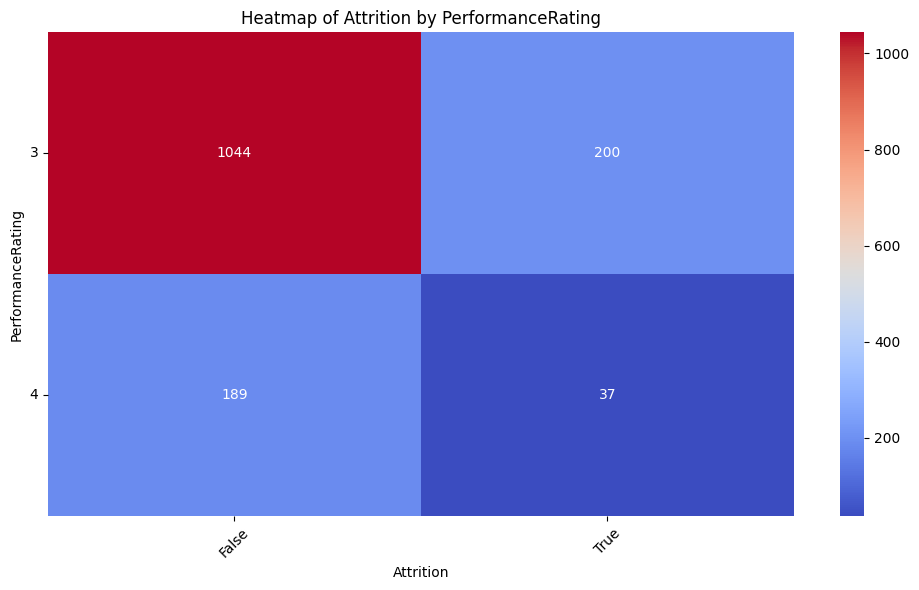

Chi-Squared Test for RelationshipSatisfaction:
Chi2 Stat: 5.241067859713709, P-value: 0.15497244371052638, Degrees of Freedom: 3
Expected Frequencies:
[[231.50204082  44.49795918]
 [254.14897959  48.85102041]
 [384.99795918  74.00204082]
 [362.35102041  69.64897959]]




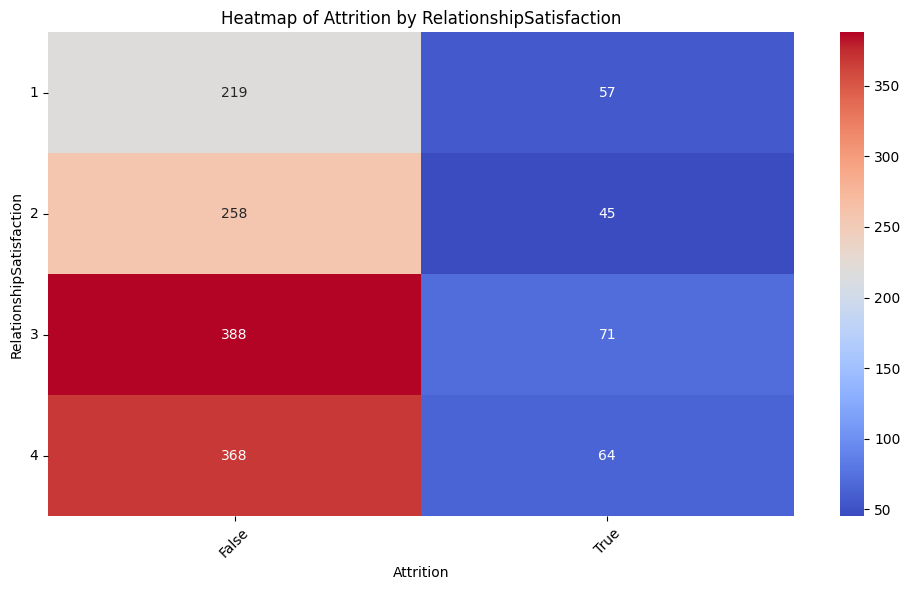

Chi-Squared Test for StockOptionLevel:
Chi2 Stat: 60.59830108612225, P-value: 4.379390336108354e-13, Degrees of Freedom: 3
Expected Frequencies:
[[529.26734694 101.73265306]
 [499.91020408  96.08979592]
 [132.52653061  25.47346939]
 [ 71.29591837  13.70408163]]




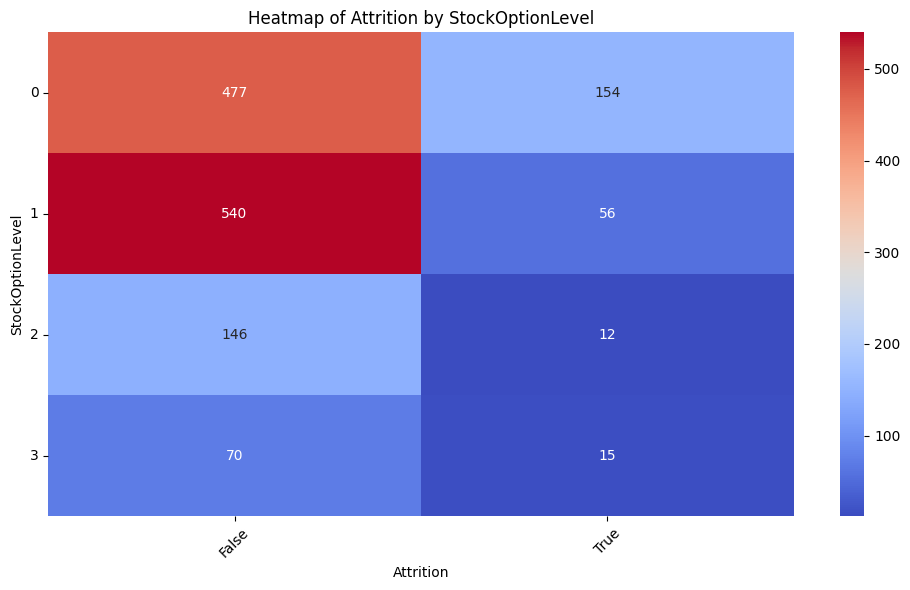

Chi-Squared Test for TrainingTimesLastYear:
Chi2 Stat: 15.146451478483337, P-value: 0.01914772986009514, Degrees of Freedom: 6
Expected Frequencies:
[[ 45.29387755   8.70612245]
 [ 59.55306122  11.44693878]
 [458.81020408  88.18979592]
 [411.83877551  79.16122449]
 [103.16938776  19.83061224]
 [ 99.81428571  19.18571429]
 [ 54.52040816  10.47959184]]




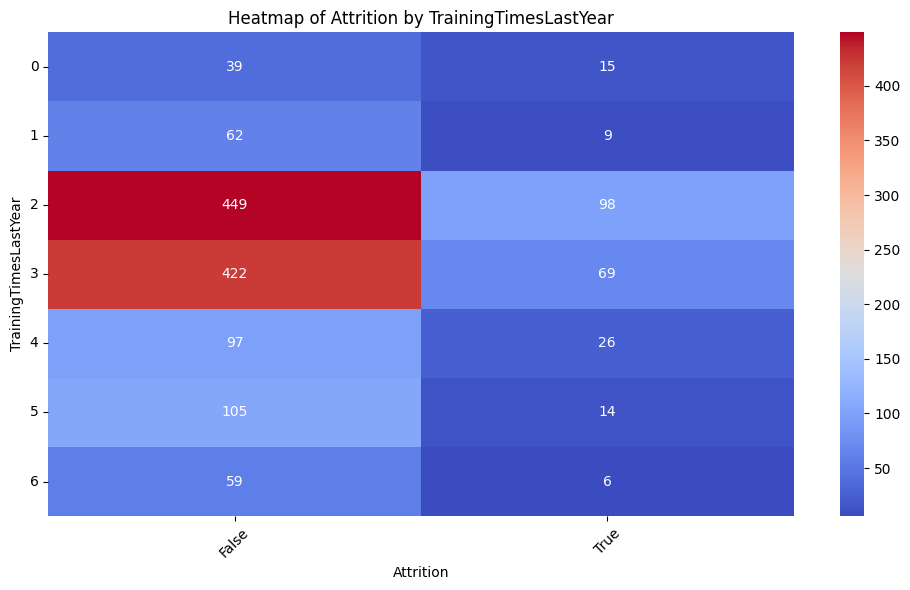

Chi-Squared Test for WorkLifeBalance:
Chi2 Stat: 16.3250970916474, P-value: 0.0009725698845348822, Degrees of Freedom: 3
Expected Frequencies:
[[ 67.10204082  12.89795918]
 [288.53877551  55.46122449]
 [749.02653061 143.97346939]
 [128.33265306  24.66734694]]




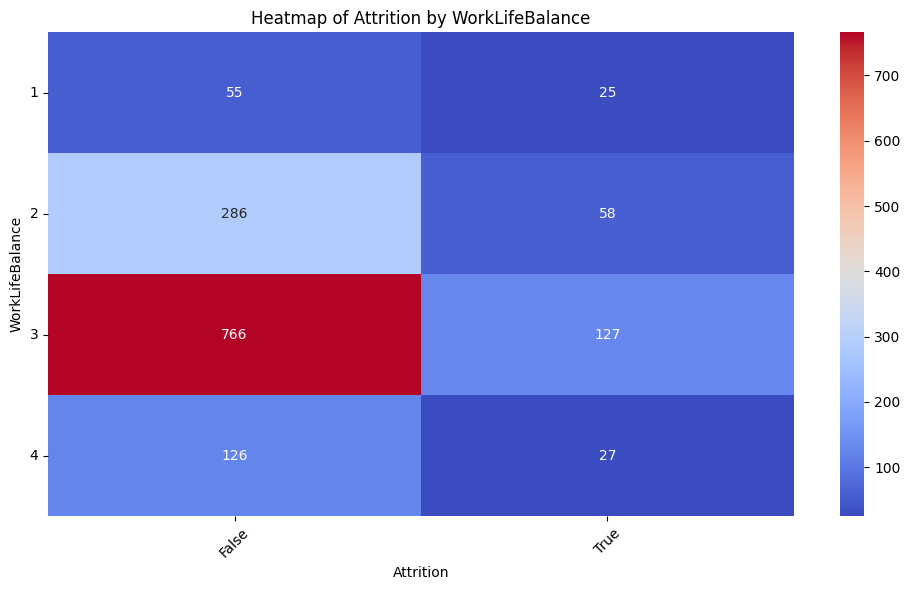

In [29]:
from scipy.stats import chi2_contingency

qualitative_features_to_remove=[]
# Perform chi-squared test
for feature in qualitative_features:
    contingency_table = pd.crosstab(df1[feature], df1['Attrition'])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    if p_val>0.05:
        qualitative_features_to_remove.append(feature)
    print(f'Chi-Squared Test for {feature}:')
    print(f'Chi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}')
    print('Expected Frequencies:')
    print(ex)
    print('\n')
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Heatmap of Attrition by {feature}')
    plt.xlabel('Attrition')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [30]:
# df1=df1.drop(columns=['Education', 'WorkLifeBalance', 'PerformanceRating', 'HourlyRate', 'PercentSalaryHike', 'JobInvolvement', 'YearsSinceLastPromotion', 
#                      'TrainingTimesLastYear', 'MonthlyRate','RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction','YearsSinceLastPromotion','NumCompaniesWorked'])
# df1=df1.drop(columns=['PerformanceRating', 'HourlyRate', 'MonthlyRate','RelationshipSatisfaction','EnvironmentSatisfaction','JobSatisfaction','YearsSinceLastPromotion','NumCompaniesWorked'])

In [31]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)

In [32]:
non_numeric_columns.remove('Attrition')

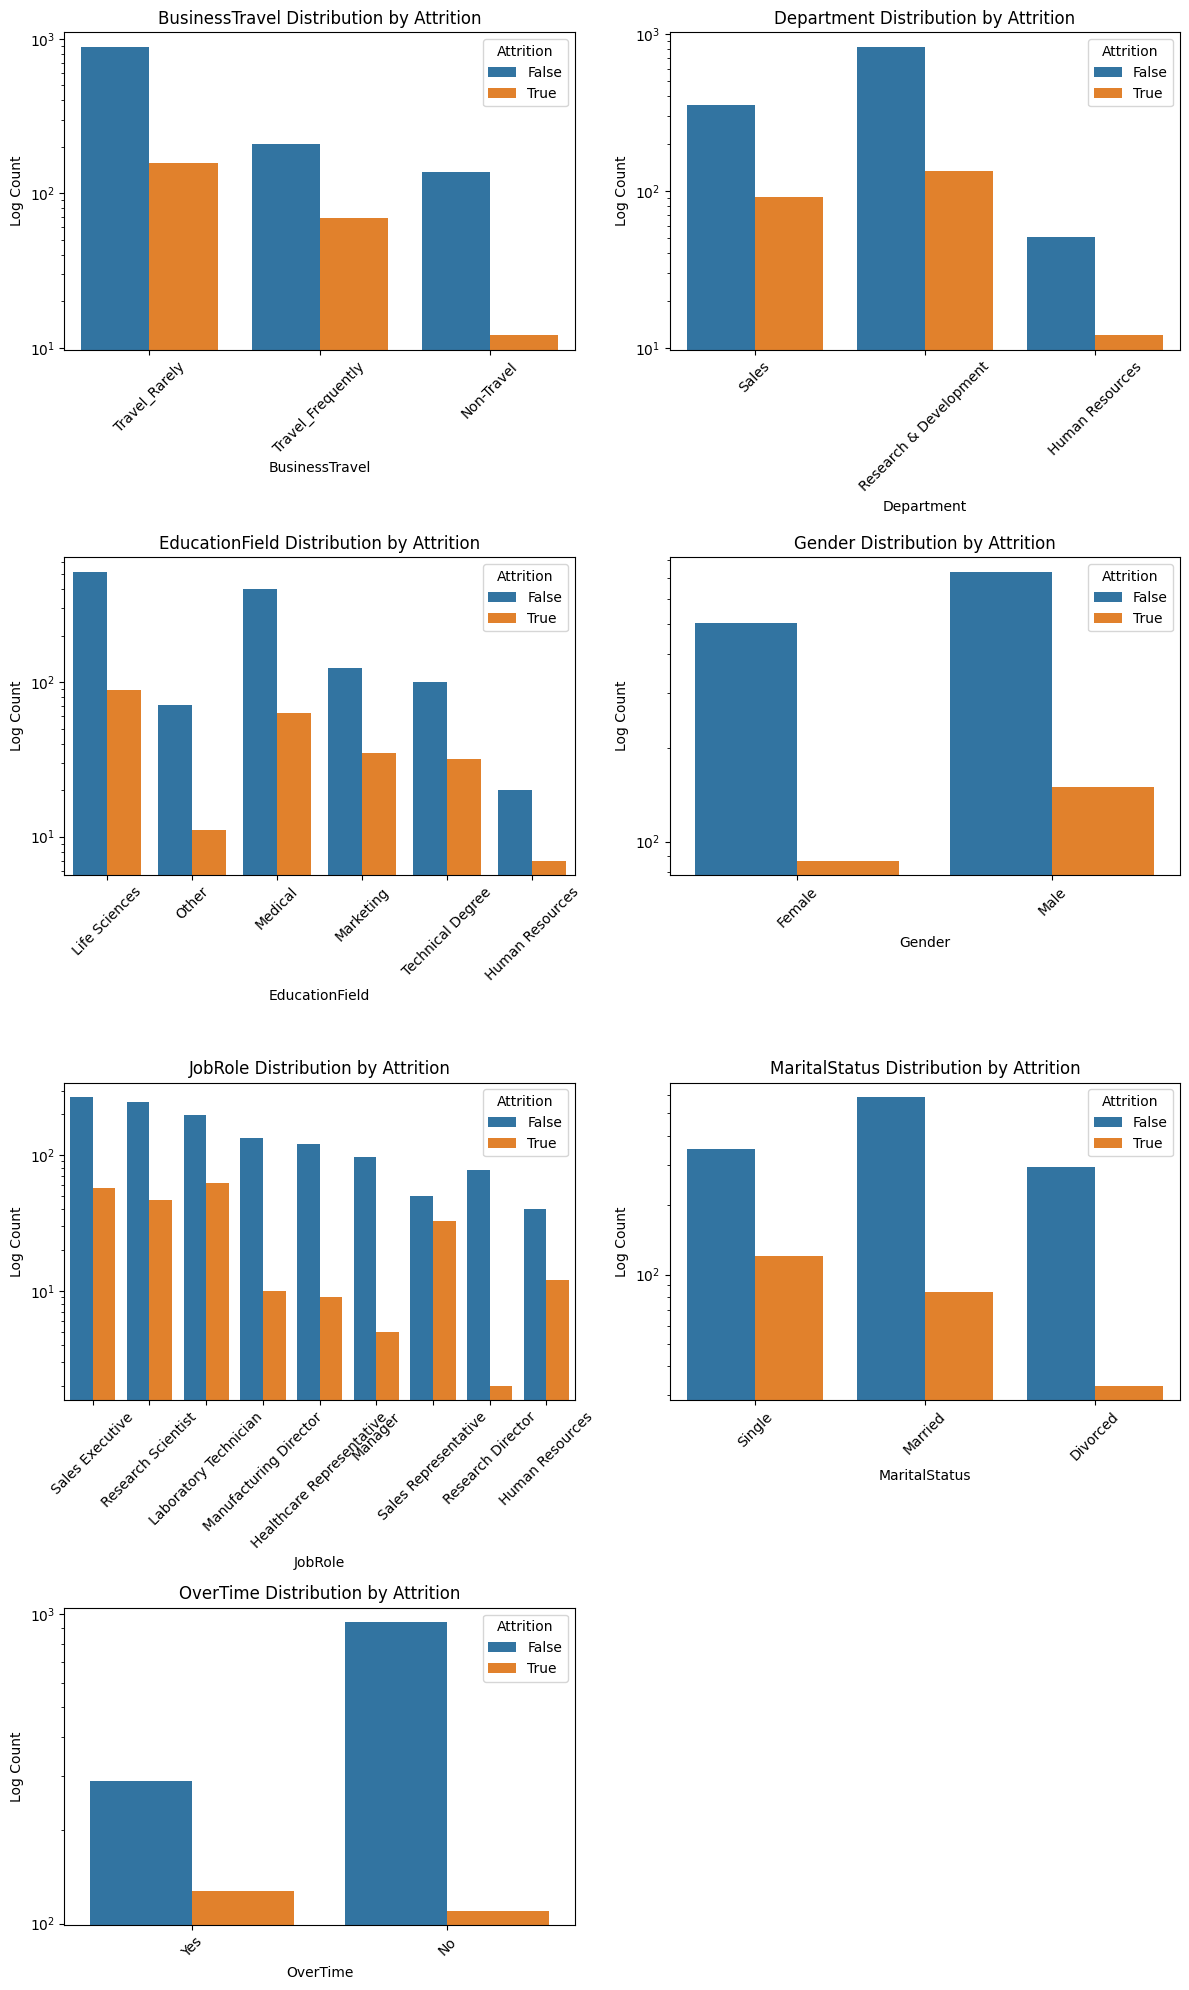

In [33]:
# Using Log scale since Attrition is unbalanced
plt.figure(figsize=(12, 20))
for i, col in enumerate(non_numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue='Attrition', data=df1)
    plt.yscale('log')  # Use logarithmic scale on y-axis
    plt.title(f'{col} Distribution by Attrition')
    plt.xlabel(col)
    plt.ylabel('Log Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature Encoding

In [34]:
for col in non_numeric_columns:
    unique_values_str = ', '.join(map(str, df1[col].unique()))
    print(f'Unique values {col.ljust(20)}:{df1[col].nunique()} -> ({(unique_values_str).center(20)})')

Unique values BusinessTravel      :3 -> (Travel_Rarely, Travel_Frequently, Non-Travel)
Unique values Department          :3 -> (Sales, Research & Development, Human Resources)
Unique values EducationField      :6 -> (Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources)
Unique values Gender              :2 -> (    Female, Male    )
Unique values JobRole             :9 -> (Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)
Unique values MaritalStatus       :3 -> (Single, Married, Divorced)
Unique values OverTime            :2 -> (      Yes, No       )


In [35]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['Gender', 'OverTime']], drop_first=True)], axis=1)
# Drop original categorical columns if needed
df1.drop(['Gender','OverTime'], axis=1,inplace=True)

In [36]:
numeric_columns,non_numeric_columns=column_list_seggregate(df1)
df1[non_numeric_columns].head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Gender_Male,OverTime_Yes
0,True,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,False,True
1,False,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,True,False
2,True,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,True,True
3,False,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,False,True
4,False,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,True,False


In [37]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'OverTime_Yes'],
      dtype='object')

In [38]:
# Concatenate original DataFrame with dummy variables
df1 = pd.concat([df1, pd.get_dummies(df1[['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']], drop_first=False)], axis=1)
# Drop original categorical columns if needed
df1.drop(['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'], axis=1,inplace=True)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   bool 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [40]:
def convert_booleans_to_integers(df):
    # Identify boolean columns
    boolean_columns = df.select_dtypes(include='bool').columns
    
    # Convert boolean columns to integers
    df[boolean_columns] = df[boolean_columns].astype(int)
    
    return df

In [41]:
df1 = convert_booleans_to_integers(df1)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [43]:
# Split the data
X = df1.drop('Attrition', axis=1)
y = df1['Attrition']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

### Attrition Dataset is unbalanced

In [46]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.16%
Leaving Rate: 16.84%
===============TEST=================
Staying Rate: 86.73%
Leaving Rate: 13.27%


In [47]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

# Explore many different models and shortlist the best ones.

In [48]:
print(qualitative_features_to_remove,quantitative_features_to_remove)

['Education', 'Gender', 'PerformanceRating', 'RelationshipSatisfaction'] ['HourlyRate', 'MonthlyRate', 'PercentSalaryHike']


In [49]:
def preprocess_data(df):
    df=df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18',
                'Education', 'Gender', 'PerformanceRating', 'RelationshipSatisfaction',
                'HourlyRate', 'MonthlyRate', 'PercentSalaryHike'],axis=1)
    df['Attrition']=df['Attrition'] == 'Yes'
    # Concatenate original DataFrame with dummy variables
    df = pd.concat([df, pd.get_dummies(df[['OverTime']], drop_first=True)], axis=1)
    # Drop original categorical columns if needed
    df.drop(['OverTime'], axis=1,inplace=True)
    # Concatenate original DataFrame with dummy variables
    df = pd.concat([df, pd.get_dummies(df[['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']], drop_first=False)], axis=1)
    # Drop original categorical columns if needed
    df.drop(['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus'], axis=1,inplace=True)
    df = convert_booleans_to_integers(df)
    # Split the data
    X = df1.drop('Attrition', axis=1)
    y = df1['Attrition']
    scaler = StandardScaler()

    x_scaled = scaler.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def preprocess_train_model(df,models):
    x_train, x_test, y_train, y_test = preprocess_data(df)
    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    # Initialize lists to store the performance metrics
    metrics = {
        'Model': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'Precision': [],
        'Recall': [],
        'ROC AUC': [],
        'F1 Score': []
    }
    
    for model in models:
        # Fit the model
        model.fit(x_train, y_train)
        
        # Make predictions
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]
        
        # Calculate metrics
        train_acc = accuracy_score(y_train, x_train_pred) * 100
        test_acc = accuracy_score(y_test, x_test_pred) * 100
        precision = precision_score(y_test, x_test_pred)
        recall = recall_score(y_test, x_test_pred)
        roc_auc = roc_auc_score(y_test, y_test_prob)
        f1 = f1_score(y_test, x_test_pred)
        
        # Append metrics to lists
        metrics['Model'].append(model.__class__.__name__)
        metrics['Train Accuracy'].append(train_acc)
        metrics['Test Accuracy'].append(test_acc)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['ROC AUC'].append(roc_auc)
        metrics['F1 Score'].append(f1)
        
    # Convert metrics dictionary to DataFrame
    metrics_df = pd.DataFrame(metrics)
    # print(metrics_df)
    return df,metrics_df

In [50]:
df2=df.copy()

In [51]:
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [52]:
result_df,metrics_df=preprocess_train_model(df2,models=models)

  File "c:\Envs\ace_analytics_3124_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [53]:
metrics_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,ROC AUC,F1 Score
0,LogisticRegression,82.975460,75.170068,0.282051,0.564103,0.773655,0.376068
1,KNeighborsClassifier,87.321063,68.027211,0.233010,0.615385,0.675365,0.338028
2,DecisionTreeClassifier,100.000000,77.891156,0.204545,0.230769,0.546757,0.216867
3,RandomForestClassifier,100.000000,88.775510,0.750000,0.230769,0.764454,0.352941
4,AdaBoostClassifier,92.586912,85.034014,0.450980,0.589744,0.802815,0.511111
5,GradientBoostingClassifier,97.239264,89.115646,0.629630,0.435897,0.790548,0.515152


# Fine-tune your models and combine them into a great solutions.

In [54]:
x_train, x_test, y_train, y_test = preprocess_data(df)

In [55]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000,class_weight="balanced")  # Increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Training Accuracy:  0.7636054421768708
Testing Accuracy:  0.7278911564625851
Precision:  0.2696629213483146
Recall:  0.6153846153846154
ROC AUC:  0.7441930618401207
F1 Score:  0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       255
           1       0.27      0.62      0.38        39

    accuracy                           0.73       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.84      0.73      0.77       294



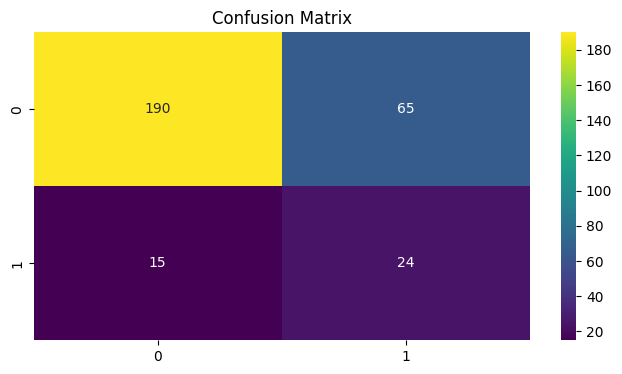

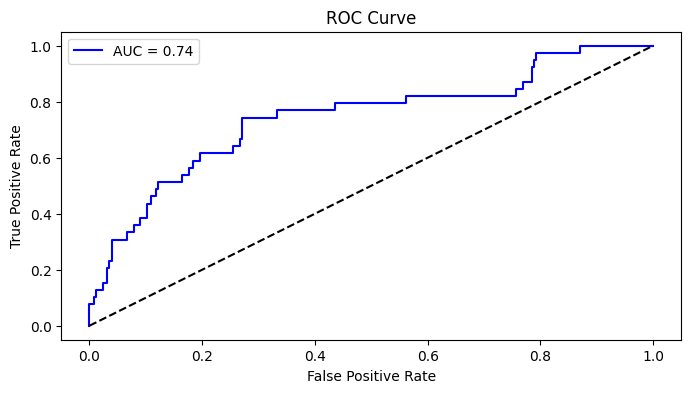

In [56]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate and print metrics
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_test_prob))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="g", cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
# Define the hyperparameters grid with fewer options
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV with ROC AUC as the scoring metric
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-validation Score:", best_score)

# Train the model with the best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_train_best = best_log_reg.predict(X_train)
y_pred_test_best = best_log_reg.predict(X_test)

print("Training Accuracy (Best Model):", accuracy_score(y_train, y_pred_train_best))
print("Testing Accuracy (Best Model):", accuracy_score(y_test, y_pred_test_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_test_best))
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_test_best))

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.8263648613291471
Training Accuracy (Best Model): 0.7908163265306123
Testing Accuracy (Best Model): 0.7244897959183674

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       255
           1       0.26      0.56      0.35        39

    accuracy                           0.72       294
   macro avg       0.59      0.66      0.59       294
weighted avg       0.83      0.72      0.76       294


Confusion Matrix (Best Model):
 [[191  64]
 [ 17  22]]


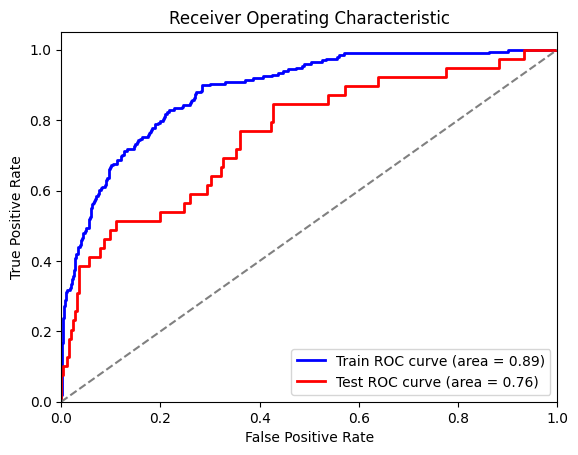

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob_train_best = best_log_reg.predict_proba(X_train)[:, 1]
y_prob_test_best = best_log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train_best)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test_best)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Present your solution.

In [63]:
# Path to save the model
model_filename = 'attrition_predict.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(best_log_reg, file)

print(f"Model saved to {model_filename}")

Model saved to attrition_predict.pkl


## We will use this pickle file in our application

# Launch, monitor and maintain your system.

##  We will use this model in our Dash Plotly application to predict Attrition within our dashboard